<a href="https://colab.research.google.com/github//pylabel-project/samples/blob/main/yolo2coco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 

# Convert Yolo V5 Annotations (TXT Files) to COCO JSON Format
Converting from yolo to another format is a little tricky because yolo format does not store the dimensions of the image, which you will need to convert to most other formats. So you need to read the image file to get the height and width of the image. The PyLabel package takes care of that. This notebook will show how you can import yolo v5 annotations and export them into another format, like COCO.



In [1]:
import logging
logging.getLogger().setLevel(logging.CRITICAL)
!pip install pylabel > /dev/null

In [2]:
from pylabel import importer

## Import Yolo annotations 
First we will import annotations stored in Yolo v5 format. (This is a sample data data set. You can edit this part to point to your dataset.)


In [3]:
%%capture
import os, zipfile

#Download sample yolo dataset 
os.makedirs("data", exist_ok=True)
!wget "https://github.com/pylabel-project/datasets_models/blob/main/coco128.zip?raw=true" -O data/coco128.zip
with zipfile.ZipFile("data/coco128.zip", 'r') as zip_ref:
   zip_ref.extractall("data")

There are two methods of importing YOLOv5 annotations. The method shown here 'ImportYoloV5' will read the annotations but you must also provide a list of the class names that map to the class ids. There is another method, 'ImportYoloV5WithYaml' that can read the class names from a YAML file, shown in this notebook: [yolo_with_yaml_importer.ipynb](https://github.com/pylabel-project/samples/blob/main/yolo_with_yaml_importer.ipynb)

In [4]:
path_to_annotations = "data/coco128/labels/train2017/"

#Identify the path to get from the annotations to the images 
path_to_images = "../../images/train2017/"

#Import the dataset into the pylable schema 
#Class names are defined here https://github.com/ultralytics/yolov5/blob/master/data/coco128.yaml
yoloclasses = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
        'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
        'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
        'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
        'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
        'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
        'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
        'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
        'hair drier', 'toothbrush']
dataset = importer.ImportYoloV5(path=path_to_annotations, path_to_images=path_to_images, cat_names=yoloclasses,
    img_ext="jpg", name="coco128")

dataset.df.head(5)

img_folder      img_filename img_path  img_id  img_width  \
id                                                                          
0   ../../images/train2017/  000000000260.jpg      NaN       0        500   
1   ../../images/train2017/  000000000260.jpg      NaN       0        500   
2   ../../images/train2017/  000000000260.jpg      NaN       0        500   
3   ../../images/train2017/  000000000260.jpg      NaN       0        500   
4   ../../images/train2017/  000000000260.jpg      NaN       0        500   

    img_height  img_depth ann_segmented  ann_bbox_xmin  ann_bbox_ymin  ...  \
id                                                                     ...   
0          333          3           NaN           2.26      93.770136  ...   
1          333          3           NaN         261.00     139.880147  ...   
2          333          3           NaN          17.29     142.160031  ...   
3          333          3           NaN         238.43     175.250075  ...   
4          333          3           NaN         332.28     232.160108  ...   

    ann_segmentation  ann_iscrowd  ann_pose  ann_truncated  ann_difficult  \
id                                                                          
0                NaN          NaN       NaN            NaN            NaN   
1                NaN          NaN       NaN            NaN            NaN   
2                NaN          NaN       NaN            NaN            NaN   
3                NaN          NaN       NaN            NaN            NaN   
4                NaN          NaN       NaN            NaN            NaN   

   cat_id  cat_name cat_supercategory split annotated  
id                                                     
0       5       bus               NaN   NaN         1  
1       0    person               NaN   NaN         1  
2       0    person               NaN   NaN         1  
3       2       car               NaN   NaN         1  
4      28  suitcase               NaN   NaN         1  

[5 rows x 25 columns]

## Analyze annotations
Pylabel can calculate basic summary statisticts about the dataset such as the number of files and the classes. 
The dataset is stored as a pandas frame so the developer can do additional exploratory analysis on the dataset. 

In [5]:
print(f"Number of images: {dataset.analyze.num_images}")
print(f"Number of classes: {dataset.analyze.num_classes}")
print(f"Classes:{dataset.analyze.classes}")
print(f"Class counts:\n{dataset.analyze.class_counts}")

Number of images: 126
Number of classes: 71
Classes:['bus', 'person', 'car', 'suitcase', 'knife', 'oven', 'microwave', 'book', 'cell phone', 'bench', 'tie', 'backpack', 'airplane', 'umbrella', 'handbag', 'chair', 'skateboard', 'elephant', 'horse', 'potted plant', 'dog', 'bicycle', 'traffic light', 'bed', 'truck', 'stop sign', 'clock', 'fork', 'pizza', 'dining table', 'cup', 'refrigerator', 'bowl', 'sink', 'vase', 'baseball glove', 'frisbee', 'train', 'motorcycle', 'cake', 'sports ball', 'baseball bat', 'giraffe', 'bear', 'kite', 'boat', 'donut', 'teddy bear', 'tennis racket', 'cat', 'couch', 'remote', 'snowboard', 'spoon', 'broccoli', 'toothbrush', 'toilet', 'bottle', 'wine glass', 'scissors', 'zebra', 'carrot', 'orange', 'bird', 'skis', 'banana', 'sandwich', 'tv', 'laptop', 'mouse', 'hot dog']
Class counts:
person      254
car          46
cup          36
chair        35
book         29
           ... 
horse         2
scissors      1
skis          1
banana        1
bear          1
Name

## Edit Annotations 
All of the annotations are stored in a Pandas dataframe that you can access directly as 'dataset.df'. Not only can you do your own custom queries of the dataset, but you can also manipulate the dataset by removing rows, changing labels, etc.  

PyLabel also includes a lightweight annotation tool that you can use to create and edit bounding box annotations within a Jupyter notebook. You can see an example of that tool here: [pylabeler.ipynb](https://github.com/pylabel-project/samples/blob/main/pylabeler.ipynb)

## Visualize Annotations 
You can render the bounding boxes for your image to inspect them and confirm that they imported correctly.  

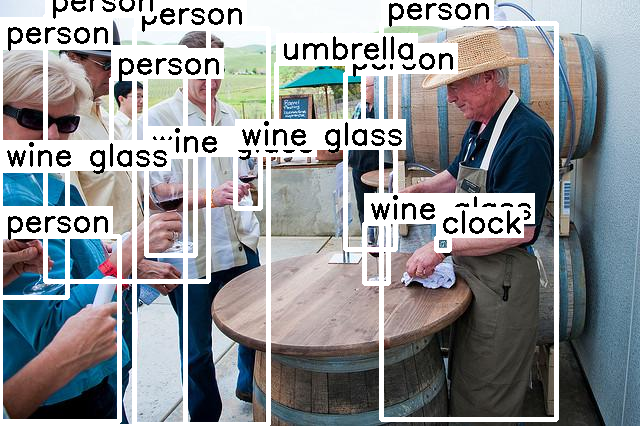

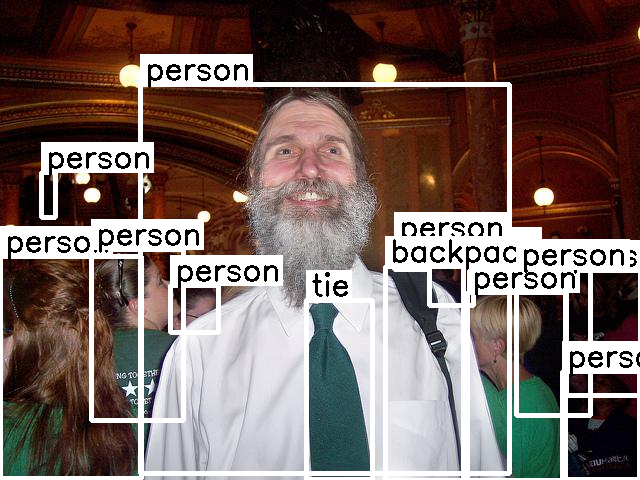

In [6]:
from IPython.display import Image, display
display(dataset.visualize.ShowBoundingBoxes(100))
display(dataset.visualize.ShowBoundingBoxes(30))


# Export to Coco Json
The PyLabel exporter will export all of the annotations in the dataframe to the desired target format.
All annotations will be stored in a single json file. 

In [7]:
dataset.export.ExportToCoco(cat_id_index=1)

['data/coco128/labels/train2017/coco128.json']

Thank you for trying PyLabel. If you had any issues running this notebook or have ideas for how to make it better, please submit an issue here https://github.com/pylabel-project/pylabel/issues. 